In [107]:
#imports 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [108]:
features = pd.read_csv('features.csv')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [109]:
train = pd.read_csv('train.csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [110]:
stock = pd.read_csv('WMT.csv')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036175,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036038,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035627,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035627,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035079,870400
...,...,...,...,...,...,...,...
12561,2022-06-17,120.019997,120.879997,117.970001,118.290001,118.290001,12166700
12562,2022-06-21,118.300003,122.779999,118.220001,122.169998,122.169998,7972200
12563,2022-06-22,122.099998,123.250000,120.589996,120.690002,120.690002,6745000
12564,2022-06-23,121.750000,123.959999,121.199997,123.620003,123.620003,6013600


In [111]:
# Read the features.csv file into a DataFrame
features = pd.read_csv('features.csv')
stock = pd.read_csv('WMT.csv')
train = pd.read_csv('train.csv')

# Merge features and train data on 'Date'
merged_data = pd.merge(features, train, on=['Store', 'Date', 'IsHoliday'])

# Merge merged_data and stock data on 'Date'
final_merged_data = pd.merge(merged_data, stock, on='Date')
final_merged_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Open,High,Low,Close,Adj Close,Volume
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409722,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409723,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409724,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409725,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,75.199997,75.419998,74.680000,75.110001,60.310581,4446900


In [112]:
# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
final_merged_data = final_merged_data[(final_merged_data['Date'] >= start_date) & (final_merged_data['Date'] <= end_date)]
final_merged_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Open,High,Low,Close,Adj Close,Volume
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409722,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409723,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409724,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,75.199997,75.419998,74.680000,75.110001,60.310581,4446900
409725,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,75.199997,75.419998,74.680000,75.110001,60.310581,4446900


In [113]:
features['Date'] = pd.to_datetime(features['Date'])
stock['Date'] = pd.to_datetime(stock['Date'])

# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
features_filtered = features[(features['Date'] >= start_date) & (features['Date'] <= end_date)]
stock_filtered = stock[(stock['Date'] >= start_date) & (stock['Date'] <= end_date)]

# Group by 'Date' and calculate the mean unemployment for each date
date_unemployment = features_filtered.groupby('Date')['Unemployment'].mean().reset_index()

# Merge mean unemployment values with stock data based on the 'Date' column
merged_data = pd.merge(date_unemployment, stock_filtered, on='Date')
merged_data

,Date,Unemployment,Open,High,Low,Close,Adj Close,Volume
0,2010-02-05,8.619311,52.770000,53.529999,52.759998,53.450001,40.073231,15545800
1,2010-02-12,8.619311,53.110001,53.110001,52.660000,52.900002,39.660881,17038400
2,2010-02-19,8.619311,53.189999,53.580002,53.070000,53.490002,40.103210,15090400
3,2010-02-26,8.619311,54.220001,54.240002,53.500000,54.070000,40.538071,15952900
4,2010-03-05,8.619311,53.970001,54.169998,53.500000,54.139999,40.590546,11375100
...,...,...,...,...,...,...,...,...
143,2012-11-30,6.953711,70.970001,72.120003,70.849998,72.019997,57.829403,12485200
144,2012-12-07,6.953711,71.900002,72.589996,71.849998,72.290001,58.368347,7283000
145,2012-12-14,6.953711,69.050003,69.300003,68.739998,68.750000,55.510063,10502300
146,2012-12-21,6.953711,68.870003,69.160004,68.269997,68.650002,55.429321,13231000


In [114]:
# Calculate average weekly sales based on store
store_avg_sales = final_merged_data.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Display the average weekly sales for each store
print(store_avg_sales)

    Store  Weekly_Sales
0       1  21590.537734
1       2  26722.773150
2       3   6338.232531
3       4  28981.088339
4       5   5025.371242
5       6  21745.312047
6       7   8317.063798
7       8  13054.044859
8       9   8717.317520
9      10  26093.554362
10     11  19143.749247
11     12  14772.352425
12     13  27154.980090
13     14  28491.967489
14     15   8911.811478
15     16   7830.711215
16     17  12891.372641
17     18  15604.930480
18     19  20197.511298
19     20  29245.224424
20     21  11188.930473
21     22  15038.299626
22     23  19593.387880
23     24  18836.582344
24     25  10217.725167
25     26  14490.344814
26     27  24643.100524
27     28  18615.961128
28     29   8073.557409
29     30   8751.658111
30     31  19603.307105
31     32  16262.318491
32     33   5725.673913
33     34  13438.052065
34     35  13695.725250
35     36   8572.841887
36     37  10284.922507
37     38   7483.494502
38     39  20849.804355
39     40  13673.395443
40     41  17863

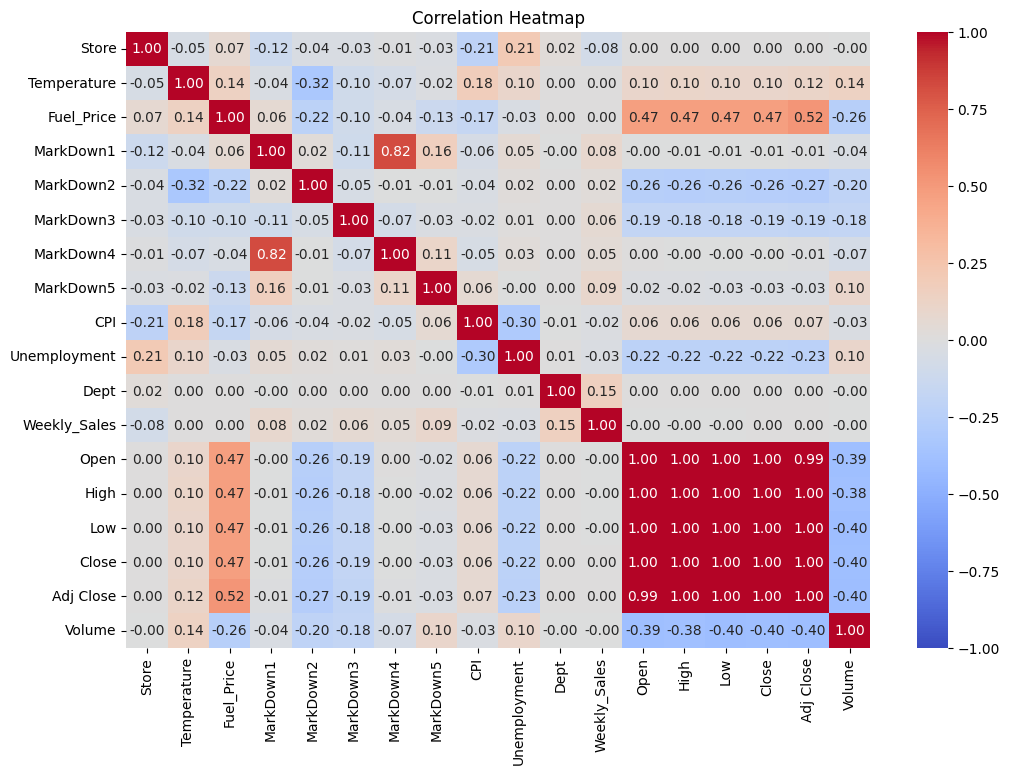

In [115]:
# Select only numeric columns
numeric_columns = final_merged_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

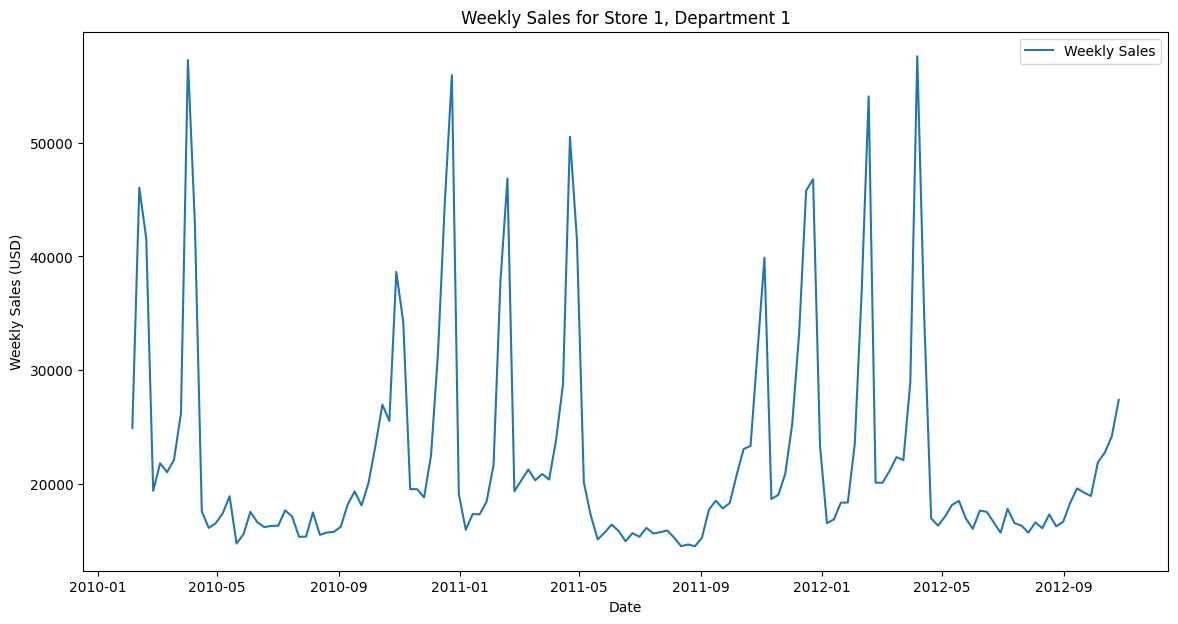

In [116]:
sales_example = train[(train['Store'] == 1) & (train['Dept'] == 1)]

plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(sales_example['Date']), sales_example['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales for Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (USD)')
plt.legend()
plt.show()

Consumer Price Index(CPI) is a measure of the average change overtime in the prices paid by consumers.

Temperature can be used since sales could fluctuate due to seasons. Lower temperature during the ends of the years suggests that it's Christmas/NewYears, thus people buy more gifts and hoard more supplies.

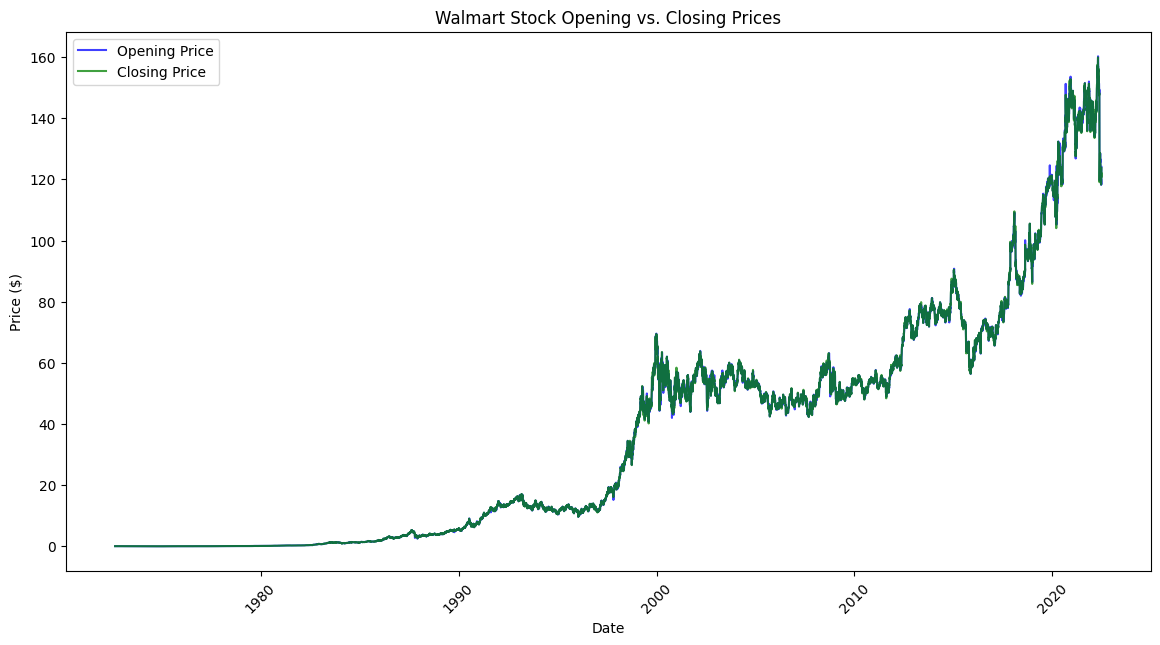

In [117]:
stock['Date'] = pd.to_datetime(stock['Date'])

plt.figure(figsize=(14, 7))
plt.plot(stock['Date'], stock['Open'], label='Opening Price', color='blue', alpha=0.75)
plt.plot(stock['Date'], stock['Close'], label='Closing Price', color='green', alpha=0.75)
plt.title('Walmart Stock Opening vs. Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


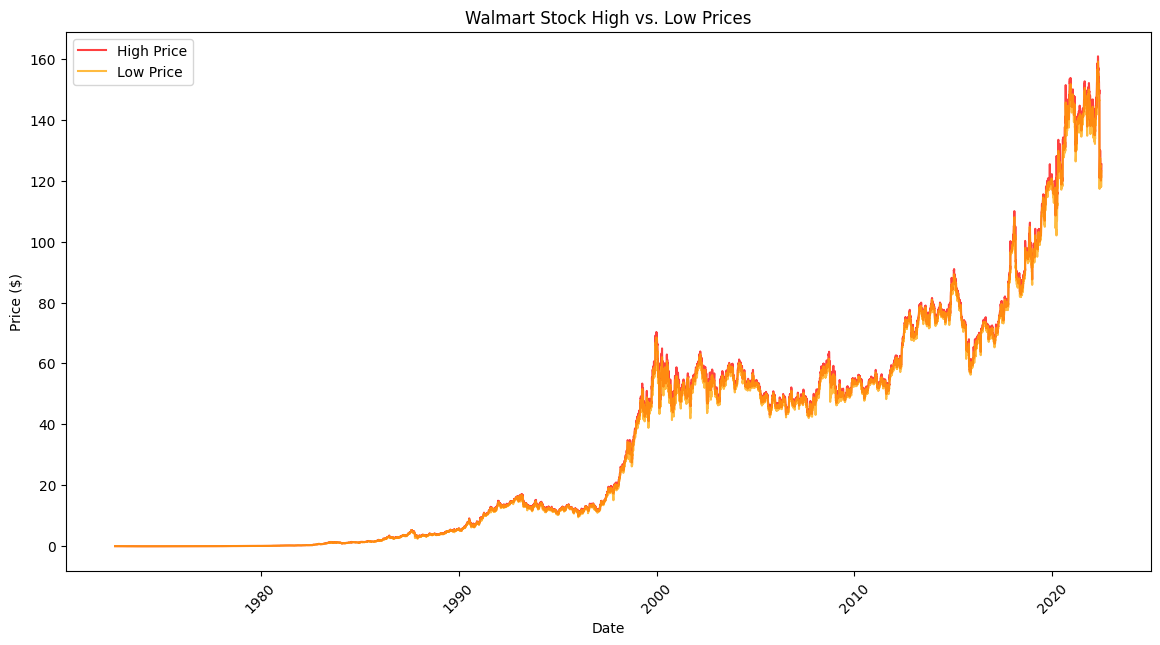

In [118]:
plt.figure(figsize=(14, 7))
plt.plot(stock['Date'], stock['High'], label='High Price', color='red', alpha=0.75)
plt.plot(stock['Date'], stock['Low'], label='Low Price', color='orange', alpha=0.75)
plt.title('Walmart Stock High vs. Low Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

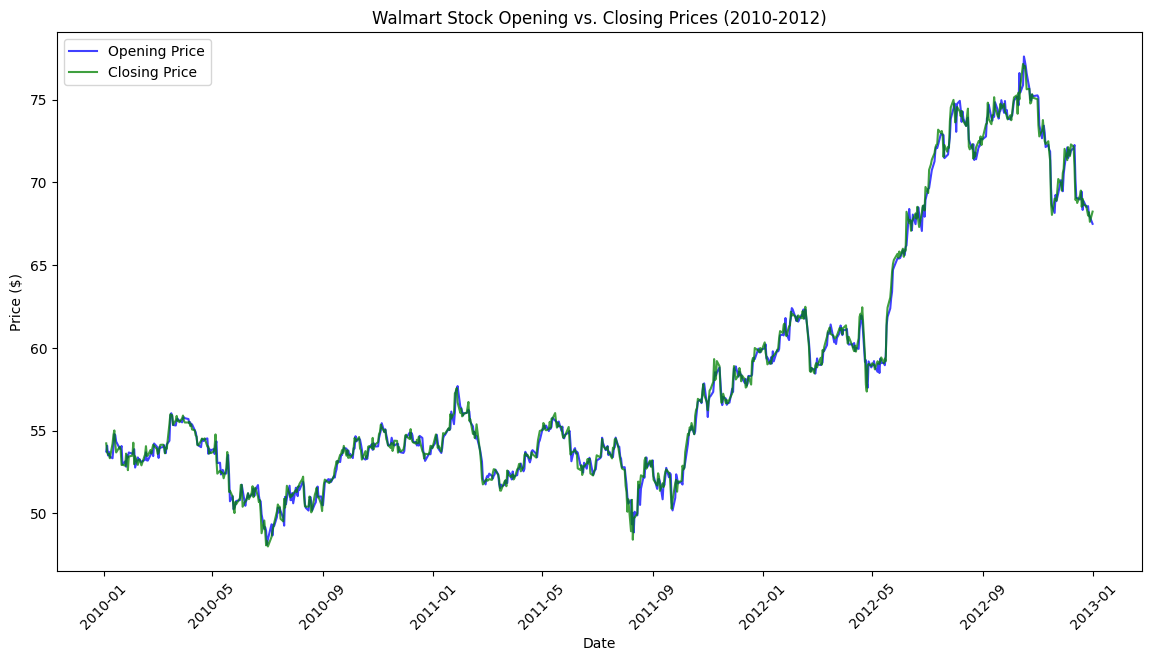

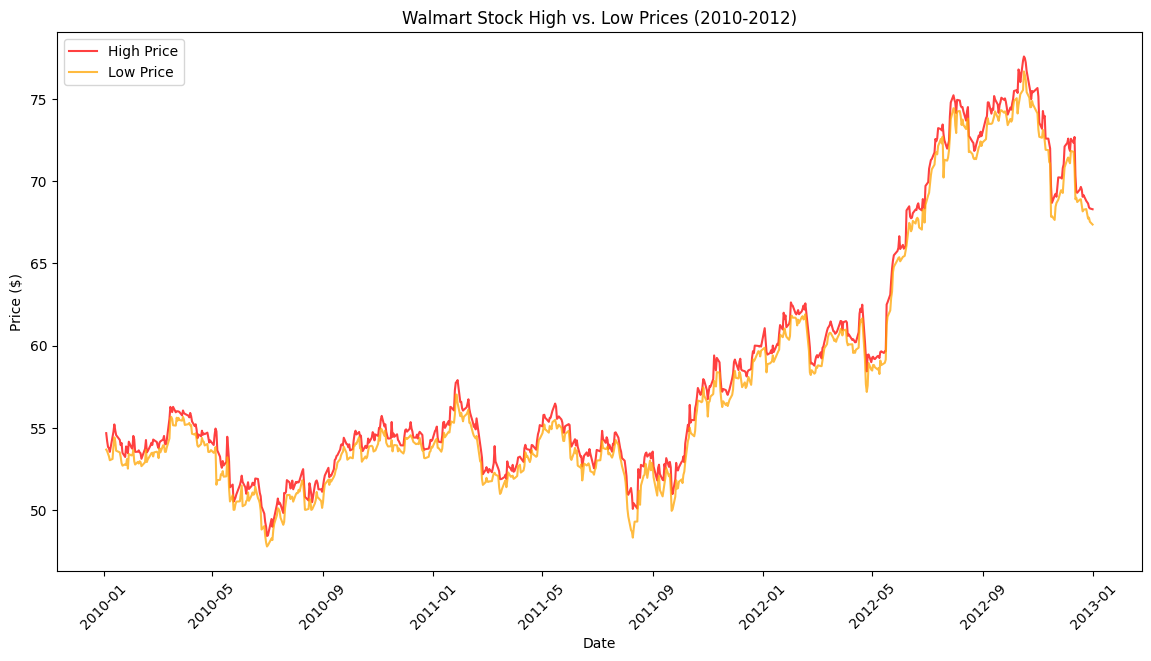

In [119]:
# Convert 'Date' column to datetime
stock['Date'] = pd.to_datetime(stock['Date'])

# Filter data for the specified date range
filtered_wmt_df = stock[(stock['Date'] >= pd.Timestamp('2010-01-01')) & (stock['Date'] <= pd.Timestamp('2012-12-31'))]

# Plot opening and closing prices
plt.figure(figsize=(14, 7))
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Open'], label='Opening Price', color='blue', alpha=0.75)
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Close'], label='Closing Price', color='green', alpha=0.75)
plt.title('Walmart Stock Opening vs. Closing Prices (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot high and low prices
plt.figure(figsize=(14, 7))
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['High'], label='High Price', color='red', alpha=0.75)
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Low'], label='Low Price', color='orange', alpha=0.75)
plt.title('Walmart Stock High vs. Low Prices (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The code above is used to find the difference between opening to closing and the highs to lows of walmarts stock over time. These graphs are used to see the fluctuations of stock prices during that day.

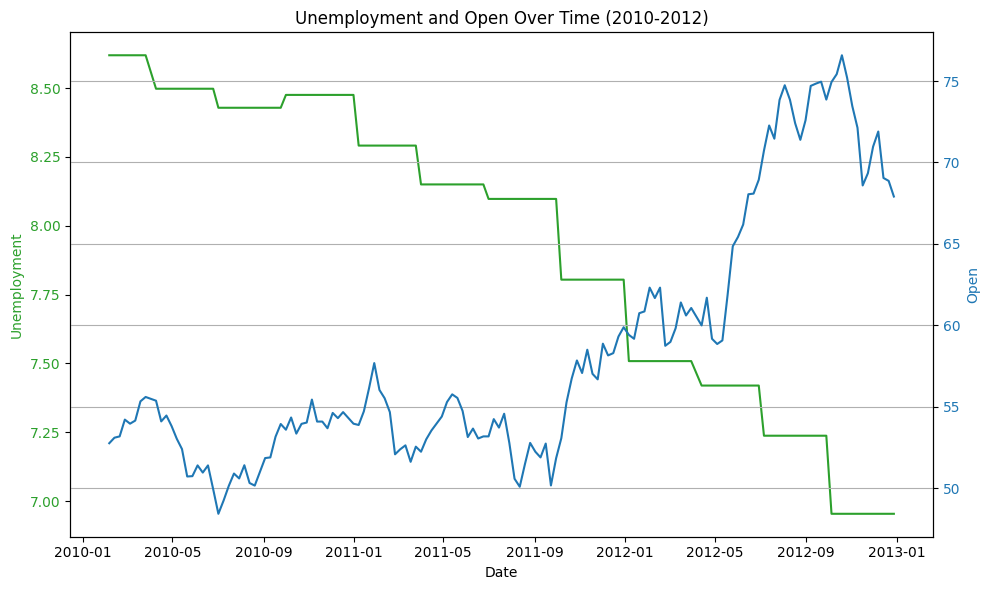

In [120]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unemployment on the first y-axis
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment', color=color)
ax1.plot(merged_data['Date'], merged_data['Unemployment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Open
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Open', color=color)
ax2.plot(merged_data['Date'], merged_data['Open'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding labels and title
plt.title('Unemployment and Open Over Time (2010-2012)')
plt.xticks(rotation=45)

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['Open']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 49.48
R-squared: 0.0456


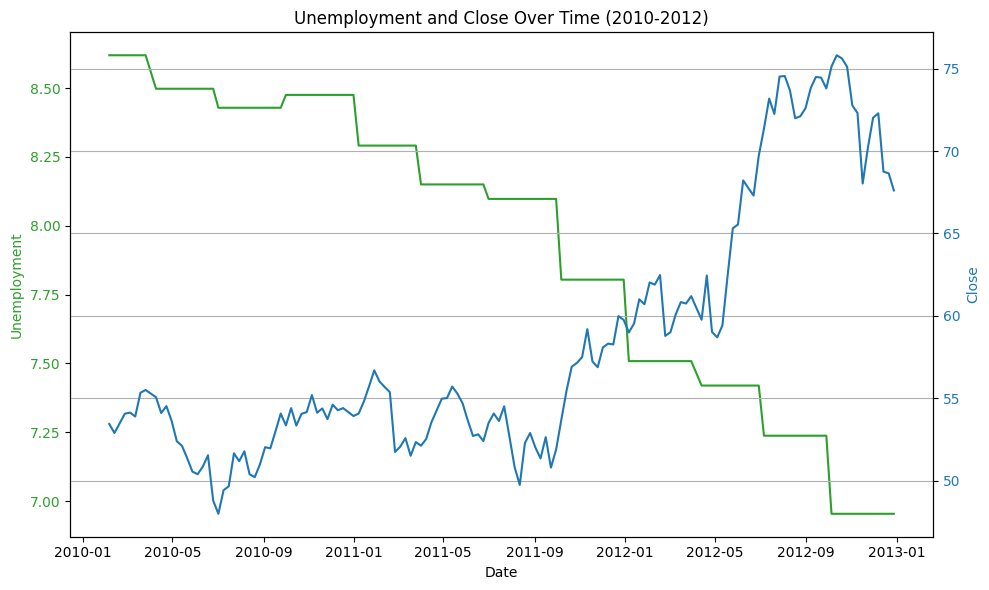

In [122]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Unemployment on the first y-axis
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment', color=color)
ax1.plot(merged_data['Date'], merged_data['Unemployment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Close
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Close', color=color)
ax2.plot(merged_data['Date'], merged_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding labels and title
plt.title('Unemployment and Close Over Time (2010-2012)')
plt.xticks(rotation=45)

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [123]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 50.16
R-squared: 0.0458


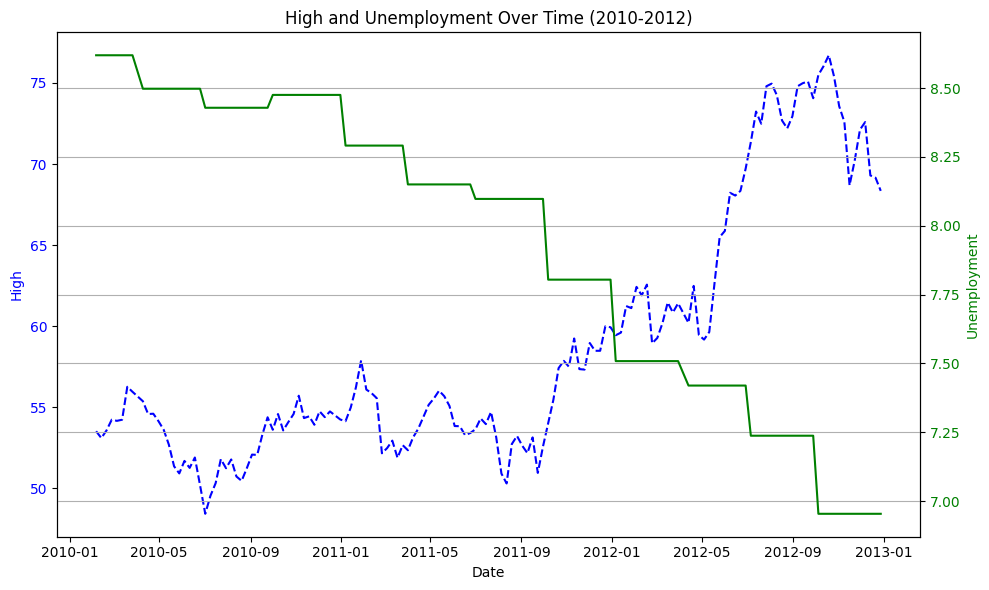

In [124]:
# Plot High
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data['Date'], merged_data['High'], color='blue', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('High', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Unemployment
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Unemployment'], color='green')
ax2.set_ylabel('Unemployment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('High and Unemployment Over Time (2010-2012)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['High']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 50.17
R-squared: 0.0459


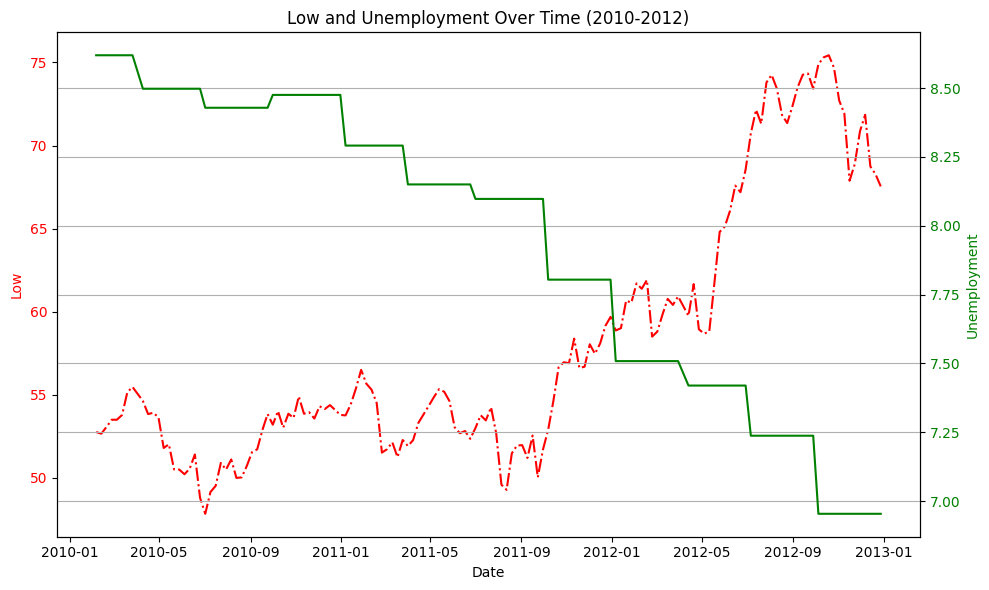

In [126]:
# Plot Low
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data['Date'], merged_data['Low'], color='red', linestyle='-.')
ax1.set_xlabel('Date')
ax1.set_ylabel('Low', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for Unemployment
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Unemployment'], color='green')
ax2.set_ylabel('Unemployment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Low and Unemployment Over Time (2010-2012)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# Select features and target variable
X = final_merged_data[['Unemployment']]
y = final_merged_data['Low']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 49.48
R-squared: 0.0457


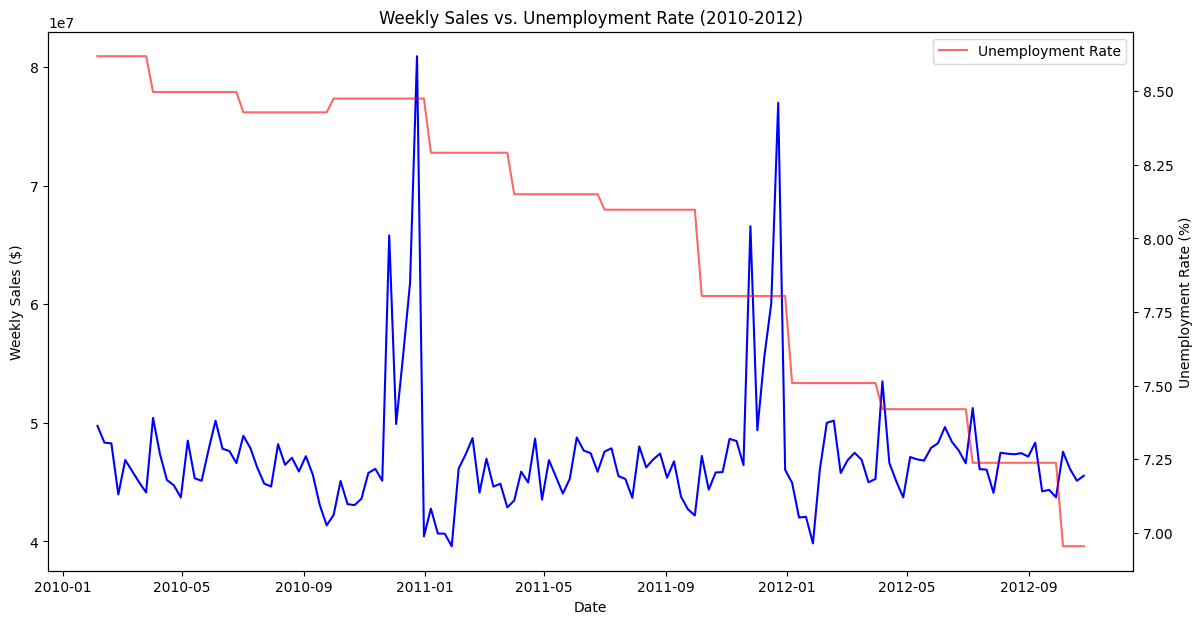

In [128]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
agg_features = features.groupby('Date')['Unemployment'].mean().reset_index()
agg_train = train.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_features, agg_train, on='Date')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

filtered_merged_df = merged_df[(merged_df['Date'] >= pd.Timestamp('2010-01-01')) & (merged_df['Date'] <= pd.Timestamp('2012-12-31'))]
plt.figure(figsize=(14, 7))

plt.plot(filtered_merged_df['Date'], filtered_merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

ax2 = plt.gca().twinx()
ax2.plot(filtered_merged_df['Date'], filtered_merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)
ax2.set_ylabel('Unemployment Rate (%)')

plt.title('Weekly Sales vs. Unemployment Rate (2010-2012)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [150]:
# Read the features.csv file into a DataFrame
features = pd.read_csv('features.csv')
stock = pd.read_csv('WMT.csv')
train = pd.read_csv('train.csv')

# Merge features and train data on 'Date'
merged_data = pd.merge(features, train, on=['Store', 'Date', 'IsHoliday'])

# Merge merged_data and stock data on 'Date'
final_merged_data = pd.merge(merged_data, stock, on='Date')

# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
final_merged_data = final_merged_data[(final_merged_data['Date'] >= start_date) & (final_merged_data['Date'] <= end_date)]

# Select features and target variable
X = final_merged_data[['Weekly_Sales']]
y = final_merged_data['Unemployment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse,2))
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', round(r2,4))

Mean Squared Error: 3.46
R-squared: 0.0008


In [129]:
# Create a new DataFrame with unemployment as the independent variable and other variables as dependent variables
data = final_merged_data[['Unemployment', 'High', 'Low', 'Close', 'Open', 'Weekly_Sales']]

# Drop rows with missing values
data = data.dropna()

# Loop through each dependent variable and fit OLS regression
for variable in ['High', 'Low', 'Close', 'Open', 'Weekly_Sales']:
    # Define X (independent variable) and y (dependent variable)
    X = data[['Unemployment']]
    y = data[variable]
    
    # Add constant term to X
    X = sm.add_constant(X)
    
    # Fit OLS regression
    model = sm.OLS(y, X).fit()
    
    # Print regression summary
    print(f"Regression Summary for {variable}:")
    print(model.summary())
    print("\n")


Regression Summary for High:
                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:55:55   Log-Likelihood:            -1.3837e+06
No. Observations:              409727   AIC:                         2.767e+06
Df Residuals:                  409725   BIC:                         2.767e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           64.

In [149]:
# Compute correlation between unemployment and high
correlation_high = final_merged_data['Unemployment'].corr(final_merged_data['High'])

# Compute correlation between unemployment and low
correlation_low = final_merged_data['Unemployment'].corr(final_merged_data['Low'])

# Compute correlation between unemployment and open
correlation_open = final_merged_data['Unemployment'].corr(final_merged_data['Open'])

# Compute correlation between unemployment and close
correlation_close = final_merged_data['Unemployment'].corr(final_merged_data['Close'])

# Compute correlation between unemployment and weekly sales
correlation_weekly_sales = final_merged_data['Unemployment'].corr(final_merged_data['Weekly_Sales'])

print("Correlation between unemployment and high:", correlation_high)
print("Correlation between unemployment and low:", correlation_low)
print("Correlation between unemployment and open:", correlation_open)
print("Correlation between unemployment and close:", correlation_close)
print("Correlation between unemployment and weekly sales:", correlation_weekly_sales)


Correlation between unemployment and high: -0.21955975007141149
Correlation between unemployment and low: -0.21938825863341632
Correlation between unemployment and open: -0.21900784725353684
Correlation between unemployment and close: -0.21967544100424152
Correlation between unemployment and weekly sales: -0.026523340867187262


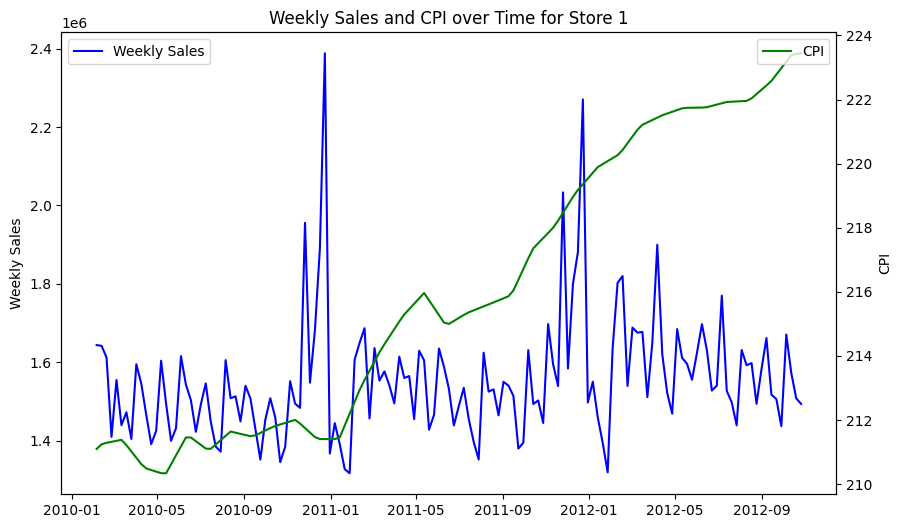

In [130]:
sales_agg = train[train['Store'] == 1].groupby('Date')['Weekly_Sales'].sum().reset_index()
sales_agg['Date'] = pd.to_datetime(sales_agg['Date'])

features_filtered = features[features['Store'] == 1][['Date', 'CPI', 'Temperature']]
features_filtered['Date'] = pd.to_datetime(features_filtered['Date'])
analysis_df = pd.merge(sales_agg, features_filtered, how='left', on='Date')
correlations = analysis_df[['Weekly_Sales', 'CPI', 'Temperature']].corr()

# Plot Weekly Sales
plt.figure(figsize=(10, 6))
plt.plot(analysis_df['Date'], analysis_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.ylabel('Weekly Sales')
plt.legend(loc='upper left')

# Create a second y-axis for CPI
ax2 = plt.gca().twinx()
ax2.plot(analysis_df['Date'], analysis_df['CPI'], label='CPI', color='green')
ax2.set_ylabel('CPI')
ax2.legend(loc='upper right')

plt.title('Weekly Sales and CPI over Time for Store 1')
plt.show()

        Date  Weekly_Sales         CPI
0 2010-02-05   49750740.50  167.730885
1 2010-02-12   48336677.63  167.825608
2 2010-02-19   48276993.78  167.871686
3 2010-02-26   43968571.13  167.909657
4 2010-03-05   46871470.30  167.947628


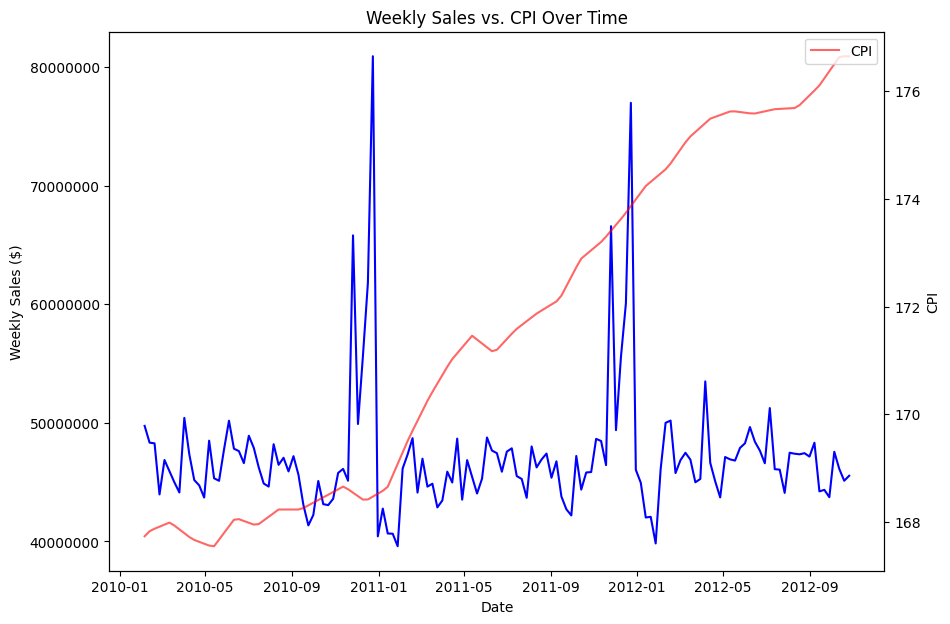

In [131]:
features_df_filtered = features.dropna(subset=['CPI']).copy()
features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])
train['Date'] = pd.to_datetime(train['Date'])

agg_features_df = features_df_filtered.groupby('Date')['CPI'].mean().reset_index()
agg_sales_df = train.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_sales_df, agg_features_df, on='Date')
print(merged_df.head())

plt.figure(figsize=(10, 7))
plt.plot(merged_df['Date'], merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

plt.ticklabel_format(style='plain', axis='y')  

ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('Weekly Sales vs. CPI Over Time')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [132]:
features['Date'] = pd.to_datetime(features['Date'])
stock['Date'] = pd.to_datetime(stock['Date'])
features_2010_2013 = features[(features['Date'] >= '2010-01-01') & (features['Date'] <= '2013-12-31')]
wmt_2010_2013 = stock[(stock['Date'] >= '2010-01-01') & (stock['Date'] <= '2013-12-31')]
merged_data = pd.merge(features_2010_2013, wmt_2010_2013, on='Date', how='inner')
merged_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Open,High,Low,Close,Adj Close,Volume
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
1,2,2010-02-05,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
2,3,2010-02-05,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
3,4,2010-02-05,43.76,2.598,NaN,NaN,NaN,NaN,NaN,126.442065,8.623,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800
4,5,2010-02-05,39.70,2.572,NaN,NaN,NaN,NaN,NaN,211.653972,6.566,False,52.77,53.529999,52.759998,53.450001,40.073231,15545800


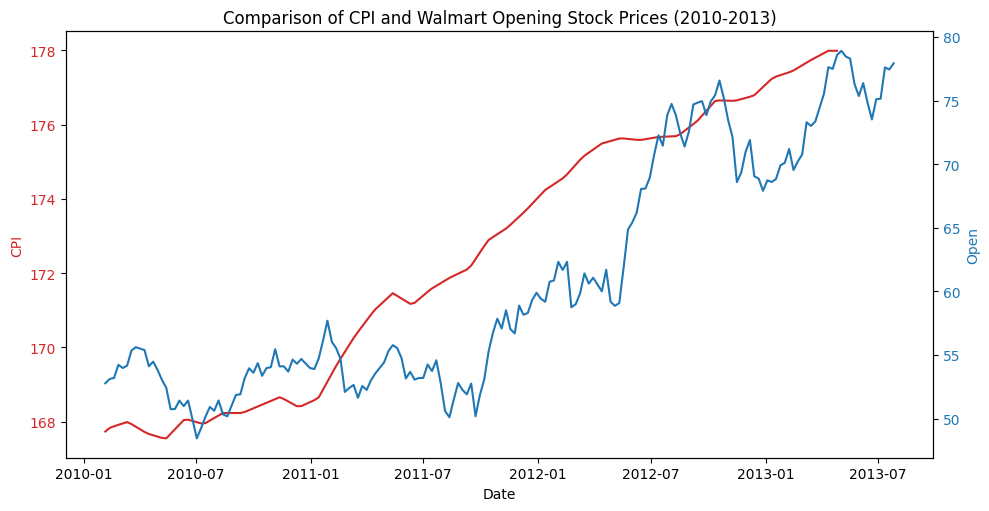

In [133]:
average_cpi_data = features_2010_2013.groupby('Date')['CPI'].mean().reset_index()
merged_data_final = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'Open']], on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final['Date'], merged_data_final['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Open', color=color)  
ax2.plot(merged_data_final['Date'], merged_data_final['Open'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Comparison of CPI and Walmart Opening Stock Prices (2010-2013)')
plt.show()

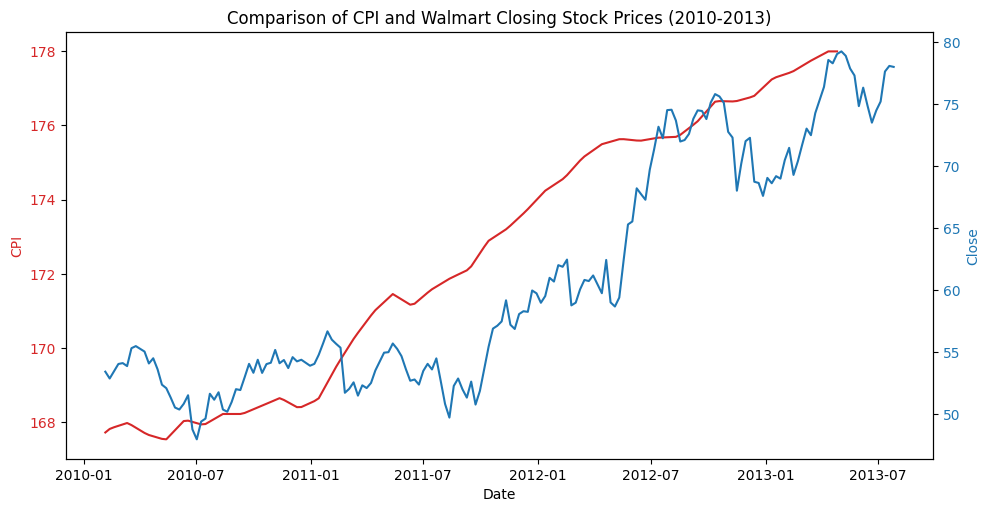

In [134]:
merged_data_final_with_close = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'Close']], on='Date', how='inner')
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final_with_close['Date'], merged_data_final_with_close['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Close', color=color) 
ax2.plot(merged_data_final_with_close['Date'], merged_data_final_with_close['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of CPI and Walmart Closing Stock Prices (2010-2013)')
plt.show()

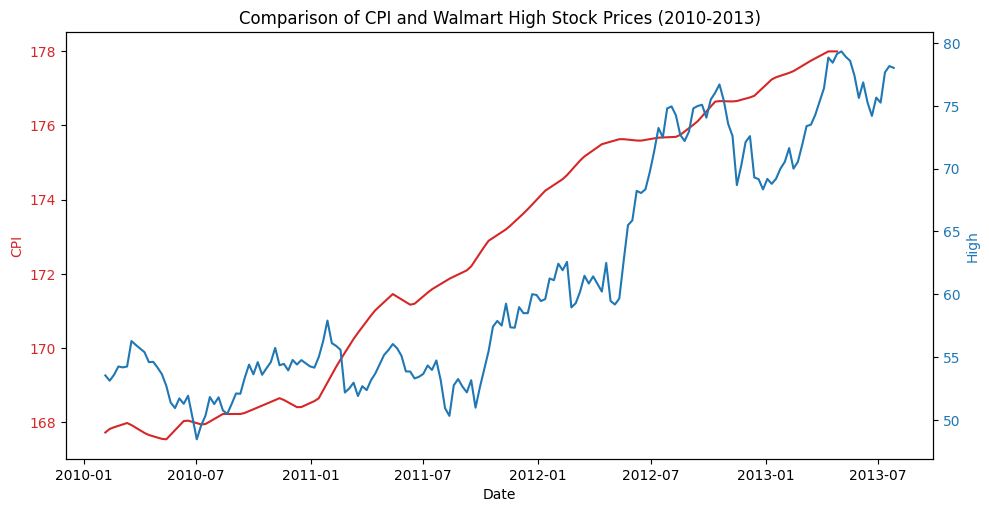

In [135]:
merged_data_final_with_high = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'High']], on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final_with_high['Date'], merged_data_final_with_high['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('High', color=color) 
ax2.plot(merged_data_final_with_high['Date'], merged_data_final_with_high['High'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of CPI and Walmart High Stock Prices (2010-2013)')
plt.show()

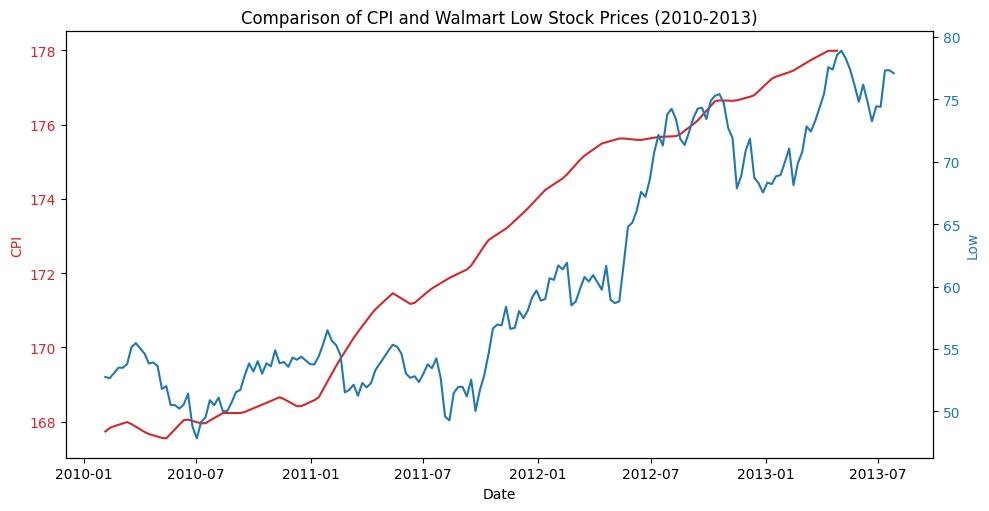

In [136]:
merged_data_final_with_low = pd.merge(average_cpi_data, wmt_2010_2013[['Date', 'Low']], on='Date', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_data_final_with_low['Date'], merged_data_final_with_low['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Low', color=color)  
ax2.plot(merged_data_final_with_low['Date'], merged_data_final_with_low['Low'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Comparison of CPI and Walmart Low Stock Prices (2010-2013)')
plt.show()

In [137]:
correlation_open = merged_data_final['CPI'].corr(merged_data_final['Open'])
correlation_close = merged_data_final_with_close['CPI'].corr(merged_data_final_with_close['Close'])
correlation_high = merged_data_final_with_high['CPI'].corr(merged_data_final_with_high['High'])
correlation_low = merged_data_final_with_low['CPI'].corr(merged_data_final_with_low['Low'])

print("CPI vs Open :",correlation_open)
print("CPI vs Close :", correlation_close)
print("CPI vs High :",correlation_high)
print("CPI vs Low :", correlation_low)

CPI vs Open : 0.8666361035581457
CPI vs Close : 0.8682166699472663
CPI vs High : 0.8681510050491542
CPI vs Low : 0.8673277775293707


In [148]:
# Create a new DataFrame with CPI as the independent variable and other variables as dependent variables
data = final_merged_data[['CPI', 'High', 'Low', 'Close', 'Open', 'Weekly_Sales']]

# Drop rows with missing values
data = data.dropna()

# Loop through each dependent variable and fit OLS regression
for variable in ['High', 'Low', 'Close', 'Open', 'Weekly_Sales']:
    # Define X (independent variable) and y (dependent variable)
    X = data[['CPI']]
    y = data[variable]
    
    # Add constant term to X
    X = sm.add_constant(X)
    
    # Fit OLS regression
    model = sm.OLS(y, X).fit()
    
    # Print regression summary
    print(f"Regression Summary for {variable}:")
    print(model.summary())
    print("\n")


Regression Summary for High:
                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1625.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:57:13   Log-Likelihood:            -1.3930e+06
No. Observations:              409727   AIC:                         2.786e+06
Df Residuals:                  409725   BIC:                         2.786e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0052  

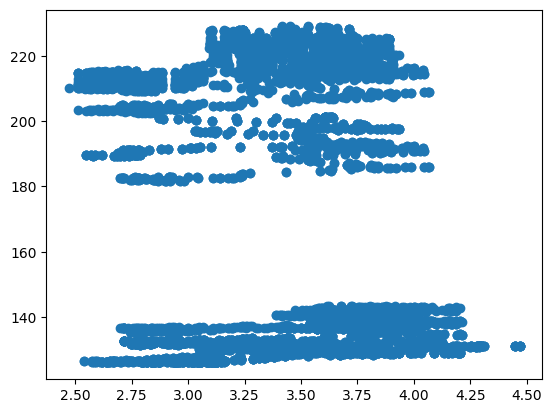

In [141]:
plt.scatter(features['Fuel_Price'], features['CPI'] )
#one factor with sales 
#same factor with opening and closing stock prices

In [142]:
# Convert 'Date' column to datetime format
features ['Date'] = pd.to_datetime (features ['Date'])
stock['Date'] = pd.to_datetime (stock['Date'])
train['Date'] = pd.to_datetime(train['Date'])

# Filter data for 2010 to 2012
start_date = '2010-01-01'
end_date = '2012-12-31'
features_filtered = features[(features['Date'] >= start_date) & (features['Date'] <= end_date)]
stock_filtered = stock[(stock['Date'] >= start_date) & (stock['Date'] <= end_date)]
weekly_sales = train[(train['Date'] >= start_date) & (train['Date'] <= end_date)]

date_fuel = features_filtered.groupby('Date')['Fuel_Price'].mean().reset_index ()
date_sales = weekly_sales.groupby('Date')['Weekly_Sales'].mean().reset_index ()
merged_data = pd.merge(date_fuel, stock_filtered, on='Date')
merged_data_sales = pd.merge(merged_data, date_sales, on='Date')
merged_data_sales

,Date,Fuel_Price,Open,High,Low,Close,Adj Close,Volume,Weekly_Sales
0,2010-02-05,2.717844,52.770000,53.529999,52.759998,53.450001,40.073231,15545800,16836.121997
1,2010-02-12,2.694022,53.110001,53.110001,52.660000,52.900002,39.660881,17038400,16352.056032
2,2010-02-19,2.672067,53.189999,53.580002,53.070000,53.490002,40.103210,15090400,16216.658979
3,2010-02-26,2.683933,54.220001,54.240002,53.500000,54.070000,40.538071,15952900,14899.549688
4,2010-03-05,2.731200,53.970001,54.169998,53.500000,54.139999,40.590546,11375100,15921.015727
...,...,...,...,...,...,...,...,...,...
134,2012-09-28,3.854578,73.860001,74.059998,73.419998,73.800003,59.258698,6021000,14765.327279
135,2012-10-05,3.845222,74.940002,75.500000,74.889999,75.129997,60.326637,5205100,15983.413747
136,2012-10-12,3.896733,75.419998,76.040001,75.300003,75.809998,60.872643,8029300,15427.596739
137,2012-10-19,3.880000,76.580002,76.709999,75.430000,75.620003,60.720097,6942500,15295.732397


Text(0.5, 1.0, 'Fuel Price vs Opening Stock Prices from 2010-2012')

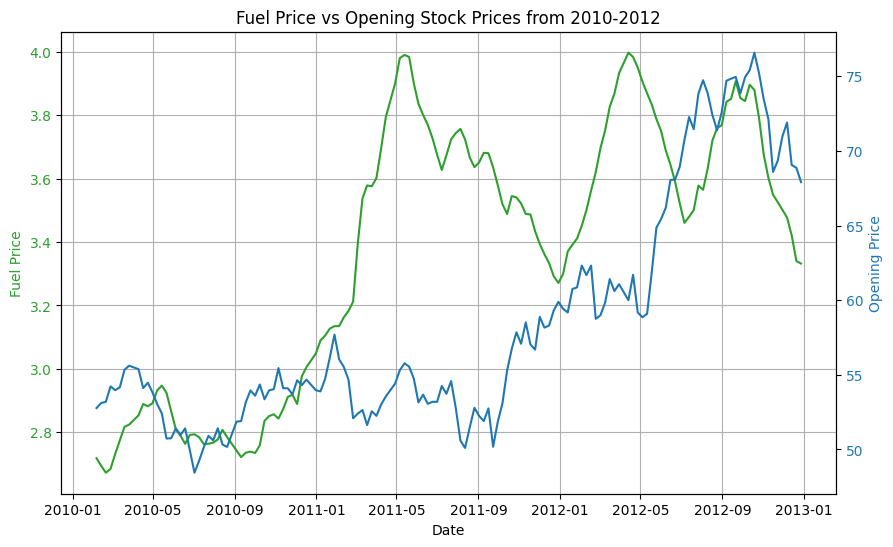

In [143]:
fig, ax1 = plt.subplots(figsize= (10, 6))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel Price', color=color)
ax1.plot(merged_data['Date'], merged_data['Fuel_Price'], color=color, label='Fuel Price')
ax1.tick_params (axis='y', labelcolor=color)
ax1.grid()


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Opening Price', color=color)
ax2.plot(merged_data['Date'], merged_data['Open'] , color=color, label= 'Opening Price')
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Fuel Price vs Opening Stock Prices from 2010-2012")

Text(0.5, 1.0, 'Fuel Prices vs Closing Stock Prices from 2010-2012')

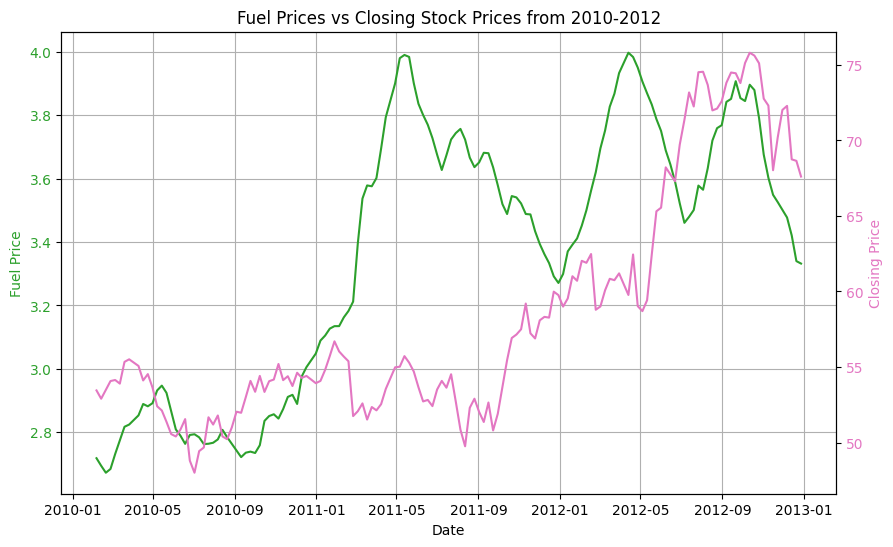

In [144]:
fig, ax1 = plt.subplots(figsize= (10, 6))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel Price', color=color)
ax1.plot(merged_data['Date'], merged_data['Fuel_Price'], color=color, label='Fuel Price')
ax1.tick_params (axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()

color = 'tab:pink'
ax2.set_ylabel('Closing Price', color=color)
ax2.plot(merged_data['Date'], merged_data['Close'] , color=color, label= 'Closing Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Fuel Prices vs Closing Stock Prices from 2010-2012")


Text(0.5, 1.0, 'Fuel Prices vs Weekly Sales from 2010-2012')

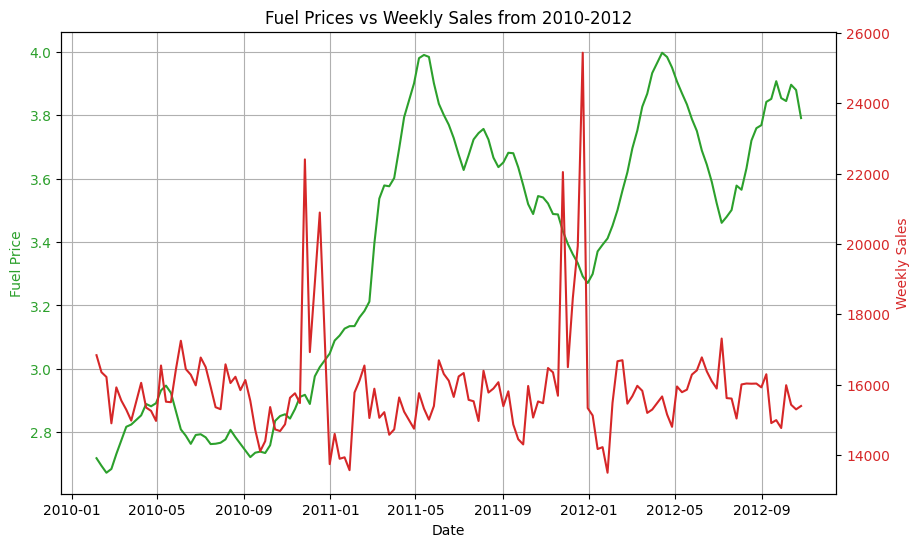

In [145]:
fig, ax1 = plt.subplots(figsize= (10, 6))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel Price', color=color)
ax1.plot(merged_data_sales['Date'], merged_data_sales['Fuel_Price'], color=color, label='Fuel Price')
ax1.tick_params (axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Weekly Sales', color=color)
ax2.plot(merged_data_sales['Date'], merged_data_sales['Weekly_Sales'] , color=color, label= 'Weekly Sales')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Fuel Prices vs Weekly Sales from 2010-2012")

In [146]:
# Create a new DataFrame with fuel prices as the independent variable and other variables as dependent variables
data = final_merged_data[['Fuel_Price', 'High', 'Low', 'Close', 'Open', 'Weekly_Sales']]

# Drop rows with missing values
data = data.dropna()

# Loop through each dependent variable and fit OLS regression
for variable in ['High', 'Low', 'Close', 'Open', 'Weekly_Sales']:
    # Define X (independent variable) and y (dependent variable)
    X = data[['Fuel_Price']]
    y = data[variable]
    
    # Add constant term to X
    X = sm.add_constant(X)
    
    # Fit OLS regression
    model = sm.OLS(y, X).fit()
    
    # Print regression summary
    print(f"Regression Summary for {variable}:")
    print(model.summary())
    print("\n")


Regression Summary for High:
                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                 1.177e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:56:05   Log-Likelihood:            -1.3421e+06
No. Observations:              409727   AIC:                         2.684e+06
Df Residuals:                  409725   BIC:                         2.684e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7538  